In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

In [2]:
def read_in_dataframe(filename, is_red):
    data = pd.read_csv(filename, ";")
    if is_red:
        data['color'] = pd.Series(np.ones(len(data)), index=data.index)
    else:
        data['color'] = pd.Series(np.zeros(len(data)), index=data.index)
    return data

def make_legend(colors, legendLabels):
    patches = [mpatches.Patch(color=colors[i], label=legendLabels[i]) for i in range(len(legendLabels))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def label_graph(axisLabels, title):
    plt.xlabel(axisLabels[0])
    plt.ylabel(axisLabels[1])
    plt.title(title)

def make_roc_curve(y_test, yps):
    colors = ['red', 'blue', 'purple', 'black']
    labels = ['Linear Regression', 'Linear Discriminant Analysis', 'Neural Networks', 'Support Nector Machines']
    
    for i in range(len(yps)):
        fpr, tpr, threshold = metrics.roc_curve(y_test, yps[i])
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, colors[i], label = 'AUC = %0.2f' % roc_auc)
    
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0, 1], [0, 1],'r--')
    label_graph(['False Positive Rate', 'True Positive Rate'], 'Receiver Operating Characteristic Curve')
    make_legend(colors, labels)
    plt.show()

In [3]:
# Read in the data as a dataframe
data_white = read_in_dataframe("C:\Users\Victoria\Downloads\winequality-white.csv", 0)
data_red = read_in_dataframe("C:\Users\Victoria\Downloads\winequality-red.csv", 1)

# Format the white data as np arrays
X_white = data_white.values[:, :-2]
y_white_quality = data_white.values[:, -2]
y_white_color = data_white.values[:, -1]

# Format the red data as np arrays
X_red = data_red.values[:, :-2]
y_red_quality = data_red.values[:, -2]
y_red_color = data_red.values[:, -1]

# Combining data into one set of np arrays
data = pd.concat([data_red, data_white])
X = np.concatenate((X_white, X_red))
y_quality = np.concatenate((y_red_quality, y_white_quality))
y_color = np.concatenate((y_red_color, y_white_color))

# Extract the labels
labels = list(data.columns.values)
labels = [labels[i].title() for i in range(len(labels))]

# Scale everything nicely
X_white_scale = preprocessing.scale(X_white)
X_red_scale = preprocessing.scale(X_red)
X_scale = preprocessing.scale(X)

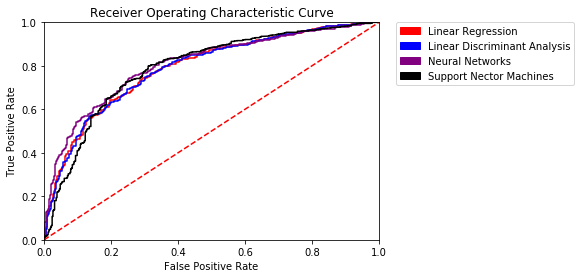

In [5]:
# Binarize the data
y = np.zeros(len(y_white_quality))
for i in range(len(y_white_quality)):
    if y_white_quality[i] > 5:
        y[i] = 1
        
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_white_scale, y)

# Make, fit, & predict with linear regression
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)
lr_yp = lr_model.predict_proba(X_test)
lr_yp = lr_yp[:, -1]

# Make, fit, & predict with linear discriminant analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
lda_model.fit(X_train, y_train)
lda_yp = lda_model.predict_proba(X_test)
lda_yp = lda_yp[:, -1]

# Make, fit, & predict with neural networks
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
nn_model.fit(X_train, y_train.ravel())
nn_yp = nn_model.predict_proba(X_test)  
nn_yp = nn_yp[:, -1]

# Make, fit, & predict with support vector machines
svm_model = svm.SVC(probability=True)
svm_model.kernel = 'poly'
svm_model.fit(X_train, y_train)
svm_yp = svm_model.predict_proba(X_test)
svm_yp = svm_yp[:, -1]

make_roc_curve(y_test, [lr_yp, lda_yp, nn_yp, svm_yp])

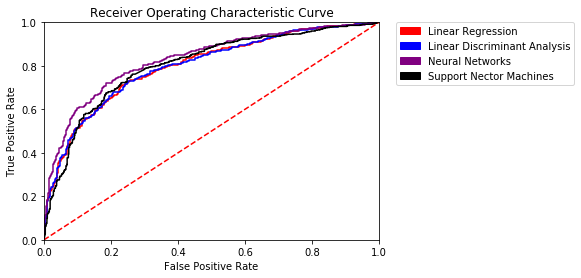

In [10]:
# Binarize the data
y = np.zeros(len(y_white_quality))
for i in range(len(y_white_quality)):
    if y_white_quality[i] > 5:
        y[i] = 1
        
# Split the data into test and training sets
ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_white_scale, y)
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample)

# Make, fit, & predict with linear regression
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)
lr_yp = lr_model.predict_proba(X_test)
lr_yp = lr_yp[:, -1]

# Make, fit, & predict with linear discriminant analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
lda_model.fit(X_train, y_train)
lda_yp = lda_model.predict_proba(X_test)
lda_yp = lda_yp[:, -1]

# Make, fit, & predict with neural networks
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
nn_model.fit(X_train, y_train.ravel())
nn_yp = nn_model.predict_proba(X_test)  
nn_yp = nn_yp[:, -1]

# Make, fit, & predict with support vector machines
svm_model = svm.SVC(probability=True)
svm_model.kernel = 'poly'
svm_model.fit(X_train, y_train)
svm_yp = svm_model.predict_proba(X_test)
svm_yp = svm_yp[:, -1]

make_roc_curve(y_test, [lr_yp, lda_yp, nn_yp, svm_yp])

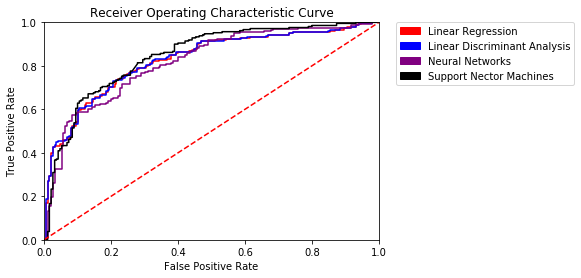

In [7]:
# Binarize the data
y = np.zeros(len(y_red_quality))
for i in range(len(y_red_quality)):
    if y_red_quality[i] > 5:
        y[i] = 1
        
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_red_scale, y)

# Make, fit, & predict with linear regression
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)
lr_yp = lr_model.predict_proba(X_test)
lr_yp = lr_yp[:, -1]

# Make, fit, & predict with linear discriminant analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
lda_model.fit(X_train, y_train)
lda_yp = lda_model.predict_proba(X_test)
lda_yp = lda_yp[:, -1]

# Make, fit, & predict with neural networks
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
nn_model.fit(X_train, y_train.ravel())
nn_yp = nn_model.predict_proba(X_test)  
nn_yp = nn_yp[:, -1]

# Make, fit, & predict with support vector machines
svm_model = svm.SVC(probability=True)
svm_model.kernel = 'poly'
svm_model.fit(X_train, y_train)
svm_yp = svm_model.predict_proba(X_test)
svm_yp = svm_yp[:, -1]

make_roc_curve(y_test, [lr_yp, lda_yp, nn_yp, svm_yp])

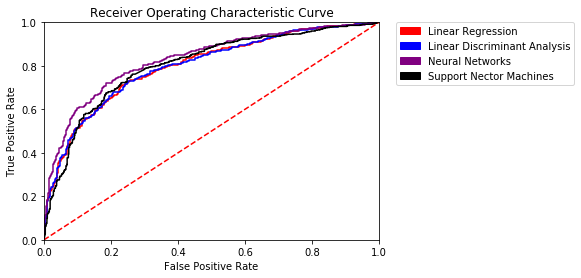

In [10]:
# Binarize the data
y = np.zeros(len(y_red_quality))
for i in range(len(y_red_quality)):
    if y__quality[i] > 5:
        y[i] = 1
        
# Split the data into test and training sets
ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_white_scale, y)
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample)

# Make, fit, & predict with linear regression
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)
lr_yp = lr_model.predict_proba(X_test)
lr_yp = lr_yp[:, -1]

# Make, fit, & predict with linear discriminant analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
lda_model.fit(X_train, y_train)
lda_yp = lda_model.predict_proba(X_test)
lda_yp = lda_yp[:, -1]

# Make, fit, & predict with neural networks
nn_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
nn_model.fit(X_train, y_train.ravel())
nn_yp = nn_model.predict_proba(X_test)  
nn_yp = nn_yp[:, -1]

# Make, fit, & predict with support vector machines
svm_model = svm.SVC(probability=True)
svm_model.kernel = 'poly'
svm_model.fit(X_train, y_train)
svm_yp = svm_model.predict_proba(X_test)
svm_yp = svm_yp[:, -1]

make_roc_curve(y_test, [lr_yp, lda_yp, nn_yp, svm_yp])